## Table of Contents
Our goal is to create randomly generated album covers with:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>

<li><a href="#ref1">Learn how to use the function display_cover</a></li>
<li><a href="#ref2">Loading a random page from Wikipedia</a></li>
<li><a href="#ref3">Extracting the Title of the Article</a></li>
<li><a href="#ref4"> Displaying the Album Cover</a></li>


</ol>



Inspiration: [Fake Album Covers](https://fakealbumcovers.com/)

#### Import libraries 


In [120]:
# Import IPython display module - Image class 
from IPython.display import Image as IPythonImage
# Python Imaging Library 
# to import an image into python
from PIL import Image 
# Imagefont module defines a class with same name. Instance of this class stores bitmap fonts.
from PIL import ImageFont 
# ImageDraw module provide simple 2D graphics for Image objects. 
#This module create new images, annotate or retiuch existing image.
from PIL import ImageDraw 

#### Helper function to superimpose text on image 


In [129]:
def display_cover(top,bottom ):
    """This function 
    """
    import requests #Requests - HTTP library. Requests allows you to send HTTP/1.1 requests extremely easily.
    
    name='album_art_raw.png'
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    
    font = ImageFont.load_default()
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    #Load a TrueType font file, and create a font object. 
    #This function loads a font object from the given file, and creates a font object for a font of the given size.
    
    band_name_font = ImageFont.truetype("fast99.ttf", 24) #24pt font size
    album_name_font = ImageFont.truetype("stocky.ttf", 24) # 24pt font size
    
    
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    outline_color ="black"
    #red outline for the text display

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

    # error resolved by downloaded the fonts fast99.tff and stocky.tff with the size of 24pt font size

 The function **display_cover**  selects a random image from https://picsum.photos/  and will help us superimpose two strings over the image. The parameter **top** is the string we would like to superimpose on the top of an image.  The parameter bottom is the string we would like to display on the bottom of the image.  The function does not return the image but returns an object of type  Image from the Pillow library; the object represents a PIL image. 

## 1) Learn how to use the function display_cover <a id='ref1'></a>

In [130]:
img=display_cover(top='Top',bottom='Bottom')

To save the image, we use the method **save** . The argument is the file  name of the image  we would like to save in this case 'sample-out.png'

In [131]:
img.save('sample-out.png') # saving the image in the new file as 'sample-out.png'

Finely we use **IPythonImage** to read the image file and display the results.


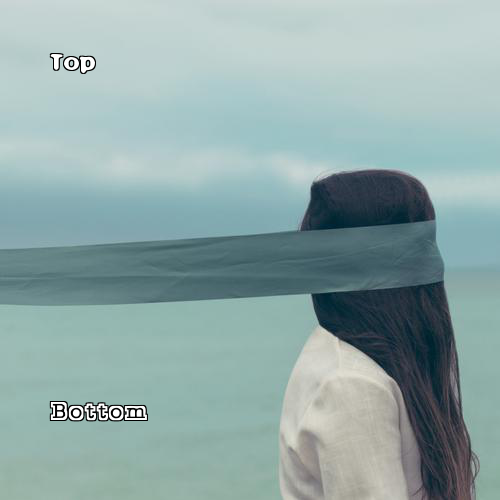

In [132]:
IPythonImage(filename='sample-out.png')  # display module - Image class . Displays and downloads the same image

**Question 1)** Use the **display_cover** function to display the image with the name Python on the top and Data Science on the bottom. Save the image as **'sample-out.png'**.

In [133]:
img=display_cover(top='Python',bottom='Data Science')

In [134]:
img.save('sample-out.png')

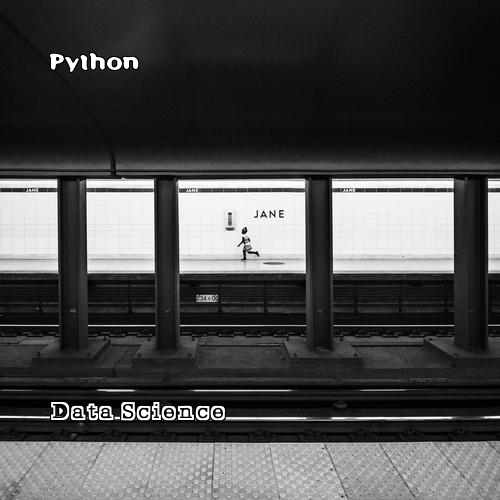

In [135]:
IPythonImage(filename='sample-out.png')

## Part 2: Loading a random page from Wikipedia  <a id='ref2'></a>

 In this project, we will use the request library, we used it in the function **display_cover**, but you should import the library in the next cell.

In [136]:
import requests #Requests - HTTP library. Requests allows you to send HTTP/1.1 requests extremely easily.

 The following is the URL to the  page 

In [137]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

**Question 2)** Get Wikipedia page is converted to a string

 Use the function **get** from the **requests** library to download the Wikipedia page using the **wikipedia_link** as an argument. Assign the object to the variable **raw_random_wikipedia_page**.

In [138]:
#hint: requests.get()
raw_random_wikipedia_page = requests.get(wikipedia_link)

 Use the data attribute **text** to extract the XML as a text file a string and assign the result variable **page**:

In [139]:
page = raw_random_wikipedia_page.text
print(page) # extracted XML as text file and prints the page 


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Gravity, Completed - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"258eb140-7e48-4893-968a-21ee27077d2f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Gravity,_Completed","wgTitle":"Gravity, Completed","wgCurRevisionId":868686481,"wgRevisionId":868686481,"wgArticleId":54585189,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Korean-language sources (ko)","Articles with short description","Articles with hAudio microformats","Album articles lacking alt text for covers","20

# Part 3: Extracting the Title of the Article <a id='ref3'></a>  

 **Question 3 (part 1)**  Use the title of the Wikipedia article as the title of the band. The title of the article is surrounded by the XML node title as follows:  **&lt;title&gt;title - Wikipedia&lt;/title>**
. For example, if the title of the article was Python we would see the following:  **&lt;title&gt;Python - Wikipedia&lt;/title>**. Consider the example where the title of the article is Teenage Mutant Ninja Turtles the result would be:  **&lt;title&gt;Teenage Mutant Ninja Turtles - Wikipedia&lt;/title>**.  The first step is to find the XML node  **&lt;title&gt;** and **&lt;/title&gt;**indicating the start and end of the title. The string function  **find** maybe helpful, you can also use libraries like **xlxml**.

In [140]:
a=page.find('<title>')
b=page.find('</title>')
c=page[a:b].replace('<title>', '')
c
#Identifying the page title 

'Gravity, Completed - Wikipedia'

 **Question 3 (part 2)** Next get rid of the term ** - Wikipedia** from the title and assign the result to the **band_title**  For example you can use the function or method **strip** or **replace**. 


In [141]:
band_title = c.replace('- Wikipedia', '')
band_title
#replace the - wikipedia with a space

'Gravity, Completed '

 **Question 4)** Repeat the second and third step, to extract the title of a second Wikipedia article but use the result to **album_title**

In [142]:
#Link for the second wikipedia 
wikipedia_link2='https://en.wikipedia.org/wiki/Special:Random'

In [143]:
#hint: requests.get()
raw_random_wikipedia_page2 = requests.get(wikipedia_link2)

In [144]:
page2 = raw_random_wikipedia_page2.text
print(page2) # extracted XML as text file and prints the page


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Turinsk - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fbbc9780-612b-4a5e-864d-f2a17454c847","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Turinsk","wgTitle":"Turinsk","wgCurRevisionId":931377745,"wgRevisionId":931377745,"wgArticleId":8323461,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Russian-language sources (ru)","Articles with Russian-language sources (ru)","Articles with short description","Infobox mapframe without OSM relation ID on Wikidata","Coordinates on 

In [145]:
a=page2.find('<title>')
b=page2.find('</title>')
c= page2[a+7:b]
album_title = c.replace('- Wikipedia', '')
album_title

'Turinsk '

 If you did everything correct the following cell should display the album and band name:


In [146]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Gravity, Completed 
Your album:  Turinsk 


## Part 4: Displaying the Album Cover  <a id='ref4'></a>

 Use the function **display_cover** to superimpose the band and album title over a random image, assign the result to the variable **album_cover **.

**Question 5)** use the function display_cover  to display the album cover with two random article titles representing the name of the band and the title of the album.

In [147]:
img=display_cover(top=band_title,bottom=album_title)

 Use the method save to save the image as **sample-out.png**:

In [148]:
img.save('sample-out.png')

Use the function **IPythonImage** to display the image 


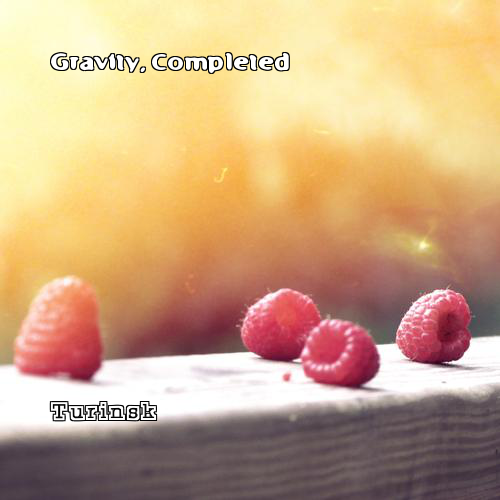

In [149]:
IPythonImage(filename='sample-out.png')

### You have successfully Completed the Assignment. Cheers..!!